In [252]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, BasicAer, Aer, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, array_to_latex

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register

q = QuantumRegister(3)

circuit = QuantumCircuit(q)

circuit.x(1)

circuit.x(2)

circuit.ccz(1,2,0)

circuit.x(1)

circuit.x(2)

circuit.draw()


q291_0: ──────■──────
        ┌───┐ │ ┌───┐
q291_1: ┤ X ├─■─┤ X ├
        ├───┤ │ ├───┤
q291_2: ┤ X ├─■─┤ X ├
        └───┘   └───┘

In [253]:
backend = BasicAer.get_backend('unitary_simulator')
job = backend.run(transpile(circuit, backend))
result = job.result().get_unitary(circuit, decimals=3)
array_to_latex(result, prefix="\\text{U = }")


<IPython.core.display.Latex object>

In [254]:
q = QuantumRegister(3)

circuit = QuantumCircuit(q)

circuit.h(1)

circuit.h(2)

circuit.h(0)

circuit.x(1)

circuit.x(2)

circuit.x(0)

circuit.ccz(1, 2, 0)

circuit.x(1)

circuit.x(2)

circuit.x(0)

circuit.h(1)

circuit.h(2)

circuit.h(0)

circuit.draw()


┌───┐┌───┐   ┌───┐┌───┐
q294_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
        ├───┤├───┤ │ ├───┤├───┤
q294_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
        ├───┤├───┤ │ ├───┤├───┤
q294_2: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
        └───┘└───┘   └───┘└───┘

In [255]:
backend = BasicAer.get_backend('unitary_simulator')
job = backend.run(transpile(circuit, backend))
result = job.result().get_unitary(circuit, decimals=3)
array_to_latex(result, prefix="\\text{U = }")


<IPython.core.display.Latex object>

In [256]:
q = QuantumRegister(3)

circuit = QuantumCircuit(q)

circuit.initialize([1/np.sqrt(8), 1/np.sqrt(8), 1 /
                   np.sqrt(8), 1/np.sqrt(8), 1/np.sqrt(8), 1/np.sqrt(8), 1/np.sqrt(8), 1/np.sqrt(8)], qubits=[q[0], q[1], q[2]])

circuit.h(1)

circuit.h(2)

circuit.h(0)

circuit.x(1)

circuit.x(2)

circuit.x(0)

circuit.ccz(1, 2, 0)

circuit.x(1)

circuit.x(2)

circuit.x(0)

circuit.h(1)

circuit.h(2)

circuit.h(0)

st0 = Statevector(circuit)
st0.draw(output='latex')


<IPython.core.display.Latex object>

# IICQ Project

The goal of this project is to show how to build quantum circuits using qiskit.

The first step is let people what Qiskit is and how to actually acess it (this is a python library yada yada yada) - Only done in ppt

The second step is to actually show how you can manipulate the basic properties of the circuit:

- How to initialize the register (all in littleEndian but clarify it can be changed)
- How to initialize the state
- How to acess the state vector  
- How to make controlled gates (littleEndian)
- How to measure
- How to simulate the circuit 
- How to draw

The third step is to show some known algorithms in Qiskit

- Grover's or Deutsche-Jostza or both (this is good practice for the test)
- Maybe even some cryptographic protocol! (No theory, just for show remember this is 15 mins)

## Initialization

- Use QuantumRegister(n) and ClassicalRegister(k), this way you can actually acess the qubits and bits. Then use QuantumCircuit(n, k)
- By default each qubit is set to the set $\ket{0}$.
- You can initialize the qubits by labelling with a string (e.g '001') or by using a list separated by commas. This values in this list are the scalars for the basis vectors. Be mindful of littleEndian!

We give some ordering examples:

- For a two-qubit system: $\ket{00} \ket{01} \ket{10} \ket{11}$

- For a three-qubit system : $\ket{000} \ket{001} \ket{010} \ket{011} \ket{100} \ket{101} \ket{110} \ket{111}$

In [257]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [258]:
# Helps with initialization. Default 0 since we might not need a classical register.
def quantum_initialization(n, k = 0):
    q = QuantumRegister(n)
    c = ClassicalRegister(k)

    qc = QuantumCircuit(n, k)

    return q, c, qc

In [259]:
# Initialization
q, c, qc = quantum_initialization(3)

qc.initialize([1, 0, 0, 0, 0, 0, 0, 0], qc.qubits)

st0 = Statevector(qc)
st0.draw(output='latex')

<IPython.core.display.Latex object>

In [260]:
qc.initialize('000', qc.qubits)

st0 = Statevector(qc)
st0.draw(output='latex')

<IPython.core.display.Latex object>

## Making Gates

Now that we know how to initialize our state lets try to make a very simple gate. For example, let's look at the Flip Operator (from PSET9)

The circuit is composed of three qubits and five gates: 4 X gates and 1 CCZ gate

To make the gates we just need to type qc."gate"("index of qubit"). If this gate is controlled we first arguments are the control qubits and the last is the target qubit.

The X gates are acting on the second and third qubit.

The CCZ gate acts on the first qubit.

We write the circuit from left to right

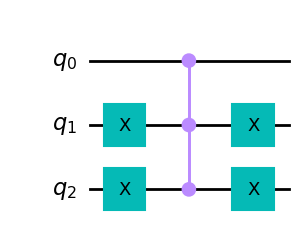

In [261]:

q, c, qc = quantum_initialization(3)

qc.x(1) 

qc.x(2)

qc.ccz(1, 2, 0)

qc.x(1)

qc.x(2)

qc.draw('mpl')

Now that our circuit is made let us apply it to our basis states

In [262]:
basis = ["000", "001", "010", "011", "100", "101", "110", "111"]

for index in basis:

    state = Statevector.from_label(index)

    state.evolve(qc).draw(output='latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can also see it in matrix form using a simulation

In [263]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
result = job.result().get_unitary(qc, decimals=3)

array_to_latex(result, prefix="\\text{U = }")

<IPython.core.display.Latex object>

We move on to a more complex task. In PSET8 there is a gate that allows us to measure the overlap between a state a and a state b. Let us actually calculate it.

To actually do this we generate random states for the second and third qubits.

Then we pass those qubits through the circuit and measure

Then we analyze the histogram

Then we are able to actually compute the overlap!

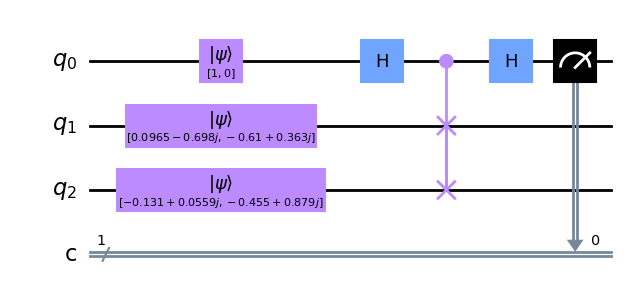

In [288]:
from qiskit.quantum_info import random_statevector
q, c, qc = quantum_initialization(3, 1)

state_a = random_statevector(2)

state_b = random_statevector(2)

qc.initialize([1, 0], 0)
qc.initialize(state_a, 1)
qc.initialize(state_b, 2)

qc.h(0)
qc.cswap(0, 1, 2)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

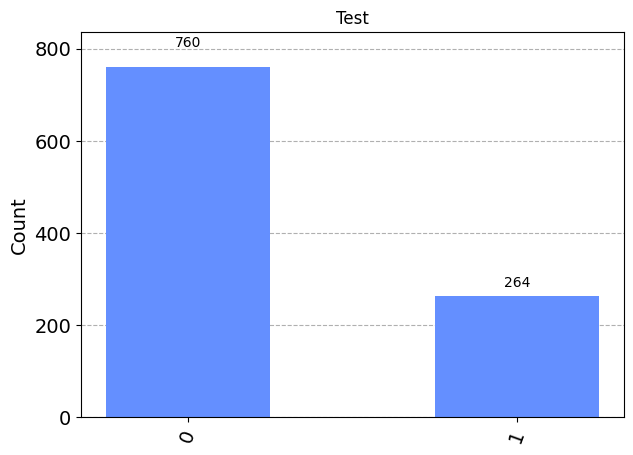

In [289]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Test')

In [297]:
def overlap(runs):
    i = 0
    while i < runs:
        q, c, qc = quantum_initialization(3, 1)

        state_a = random_statevector(2)

        state_b = random_statevector(2)

        actual_prob = 0.5 * ( 1 - (state_a.inner(state_b)) ** 2)

        qc.initialize([1, 0], 0)
        qc.initialize(state_a, 1)
        qc.initialize(state_b, 2)

        qc.h(0)
        qc.cswap(0, 1, 2)
        qc.h(0)
        qc.measure(0, 0)

        circ = transpile(qc, simulator)

        result = simulator.run(qc).result()
        counts = result.get_counts(qc)

        measured_prob =  counts.get('0') / (counts.get('0') + counts.get('1'))

        print("Actual prob: " + str(actual_prob) + ", Measured prob: " + str(measured_prob))

        i = i + 1

In [298]:
overlap(100)

0.763671875
Actual overlap: (-0.569222673957386-0.3799140842818001j), Measured overlap: nan
0.55078125
Actual overlap: (-0.31564091118218685-0.16551249596174628j), Measured overlap: nan
0.4970703125
Actual overlap: (-0.14880172628507293+0.09744761567118287j), Measured overlap: 0.07654655446197431
0.9736328125
Actual overlap: (-0.4920132730440293+0.8410272595874937j), Measured overlap: nan
0.66015625
Actual overlap: (-0.5258440878939503+0.057315419864965134j), Measured overlap: nan
0.6181640625
Actual overlap: (0.24578124623840691-0.41241855161181684j), Measured overlap: nan
0.6240234375
Actual overlap: (-0.12965211731594906-0.48780316362328957j), Measured overlap: nan
0.5517578125
Actual overlap: (-0.018263791034639154-0.3001138316934271j), Measured overlap: nan
0.5439453125
Actual overlap: (0.16462646338040807+0.17015757703151838j), Measured overlap: nan
0.849609375
Actual overlap: (-0.486582505130156+0.6513006699355669j), Measured overlap: nan
0.5224609375
Actual overlap: (-0.2053326

/tmp/ipykernel_283/3917423859.py:30: RuntimeWarning: invalid value encountered in sqrt
  measure_overlap = np.sqrt(1 - 2 * prob)


0.8076171875
Actual overlap: (-0.4452042512759755+0.6438349192698669j), Measured overlap: nan
0.4541015625
Actual overlap: (-0.009114444274400623+0.04176434878318716j), Measured overlap: 0.3029799910885206
0.6865234375
Actual overlap: (0.5155358866246365-0.39996829605268125j), Measured overlap: nan
0.986328125
Actual overlap: (-0.912079809311663-0.3698973367720745j), Measured overlap: nan
0.5517578125
Actual overlap: (0.14240716912154866-0.32485071390138004j), Measured overlap: nan
0.75390625
Actual overlap: (0.3374117591625655+0.6222291791037515j), Measured overlap: nan
0.5322265625
Actual overlap: (-0.25997992137409065-0.044925029739970895j), Measured overlap: nan
0.82421875
Actual overlap: (0.7765918529269938-0.18229561292137997j), Measured overlap: nan
0.77734375
Actual overlap: (-0.6542642362313366-0.3390060366469191j), Measured overlap: nan
0.91015625
Actual overlap: (-0.21356989175610805+0.9022837305262206j), Measured overlap: nan
0.7041015625
Actual overlap: (-0.458704064349977